Team Bithug
---

![alt text](https://sciencebusiness.net/sites/default/files/styles/article/public/2020-03/bigstock-Coronavirus-In-China-Novel-Co-347904061.jpg?itok=BOyk_4J9)

Our project is all about exploring how Coronavirus has impacted the US economy and Population. However, first we will be doing some predictions using the data till March and predicting cases in April. We ran few models to test each one's accuracy. 
Next, we identify the most affected sectors by this pandemic and deep dive into a couple of those sectors. We analyze the data for the most affected and least affected sector during this time. Apart from this, we compare its stock to the previous pandemic in US and how it had impacted the economy for its duration.


![Economy!!](https://media.giphy.com/media/iP1qEUE7VKhLq/giphy.gif "chess")





In [0]:
# Visualisation libraries
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
%matplotlib inline
import plotly.graph_objects as go
import pandas as pd
import numpy as np
import random
import datetime
import operator
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
plt.style.use('fivethirtyeight')
# Disable warnings 
import warnings
warnings.filterwarnings('ignore')

Initially, lets observe the current scenario of confirmed cases, recovered cases and total deaths across the world

![alt text](https://static.javatpoint.com/core/conversion/images/java-date-to-string.png)

Dataset Introduction: We picked up data set from a github link which allows us to use the live streaming data.
Data : Dates , Confirmed , Recovered, Deaths
Issues and challenges : Strings --> Dates
                        Reindexing data frames
Finding the model which gives us least possible error

In [0]:
df = pd.read_csv("sample_data/covid_19_data.csv")
df_recovered = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
df_confirmed = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
df_deaths = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
df.rename(columns={'ObservationDate':'Date','Country/Region':'Country'},inplace=True)
df_recovered.rename(columns={'Country/Region':'Country'},inplace = True)
df_deaths.rename(columns={'Country/Region':'Country'},inplace = True)
df_confirmed.rename(columns={'Country/Region':'Country'},inplace = True)
df.groupby("Country")[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index() 
confirmed = df.groupby('Date').sum()['Confirmed'].reset_index()
deaths = df.groupby('Date').sum()['Deaths'].reset_index()
recovered = df.groupby('Date').sum()['Recovered'].reset_index()
fig = go.Figure()
fig.add_trace(go.Scatter(x=confirmed['Date'], y=confirmed['Confirmed'],mode='lines+markers',name='Confirmed',line=dict(color='blue', width=2)))
fig.add_trace(go.Scatter(x=deaths['Date'],y=deaths['Deaths'],mode='lines+markers', name='Deaths',line=dict(color='Red', width=2) ))
fig.add_trace(go.Scatter(x=recovered['Date'], y=recovered['Recovered'],mode='lines+markers',name='Recovered',line=dict(color='Green', width=2)))
fig.update_layout(
    title='Worldwide Corona Virus Cases - Confirmed, Deaths, Recovered (Line Chart)',
    xaxis_tickfont_size=14,
    yaxis=dict(
        title='Number of Cases',
        titlefont_size=16,
        tickfont_size=14,),
     legend=dict(
        x=0,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)' ))
fig.show()

In [0]:
df.head()

,SNo,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [0]:
df_confirmed.head()

,Province/State,Country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,11,16,21,22,22,22,24,24,40,40,74,84,94,110,110,120,170,174,237,273,281,299,349,367,423,444,484,521,555,607,665,714,784,840,906,933,996,1026,1092,1176
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,38,42,51,55,59,64,70,76,89,104,123,146,174,186,197,212,223,243,259,277,304,333,361,377,383,400,409,416,433,446,467,475,494,518,539,548,562,584,609,634
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,37,48,54,60,74,87,90,139,201,230,264,302,367,409,454,511,584,716,847,986,1171,1251,1320,1423,1468,1572,1666,1761,1825,1914,1983,2070,2160,2268,2418,2534,2629,2718,2811,2910
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,2,39,39,53,75,88,113,133,164,188,224,267,308,334,370,376,390,428,439,466,501,525,545,564,583,601,601,638,646,659,673,673,696,704,713,717,717,723
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,2,2,3,3,3,4,4,5,7,7,7,8,8,8,10,14,16,17,19,19,19,19,19,19,19,19,19,19,24,24,24,24,25


# New Section

Here, we can observe that the confirmed cases has exponentially risen. Similarly, the deaths and recovered cases has also risen in such a manner if we observe its seperate figures.


In [0]:
##Get all the dates for the outbreak
cols = df_confirmed.keys()
confirmed = df_confirmed.loc[:, cols[4]:cols[-1]]
deaths = df_deaths.loc[:, cols[4]:cols[-1]]
recoveries = df_recovered.loc[:, cols[4]:cols[-1]]
dates = confirmed.keys()
world_cases = []
total_deaths = [] 
mortality_rate = []
recovery_rate = [] 
total_recovered = [] 
total_active = [] 
us_cases = [] 
india_cases = []

for i in dates:
    confirmed_sum = confirmed[i].sum()
    death_sum = deaths[i].sum()
    recovered_sum = recoveries[i].sum()
    
    # confirmed, deaths, recovered, and active
    world_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    total_recovered.append(recovered_sum)
    total_active.append(confirmed_sum-death_sum-recovered_sum)
    
    # calculate rates
    mortality_rate.append(death_sum/confirmed_sum)
    recovery_rate.append(recovered_sum/confirmed_sum)

    # case studies 
    
    us_cases.append(df_confirmed[df_confirmed['Country']=='US'][i].sum())
    india_cases.append(df_confirmed[df_confirmed['Country']=='India'][i].sum())
    
  ##Getting Daily Increase
def daily_increase(data):
    d = [] 
    for i in range(len(data)):
        if i == 0:
            d.append(data[0])
        else:
            d.append(data[i]-data[i-1])
    return d 

world_daily_increase = daily_increase(world_cases)
us_daily_increase = daily_increase(us_cases)
india_daily_increase = daily_increase(india_cases)

Now, as we prepare to run our models, we will be creating the training data. Based on the data from the last few months, we predict the number of cases for last 10 days in April

In [0]:
days_since_1_22 = np.array([i for i in range(len(dates))]).reshape(-1, 1)
world_cases = np.array(world_cases).reshape(-1, 1)
total_deaths = np.array(total_deaths).reshape(-1, 1)
total_recovered = np.array(total_recovered).reshape(-1, 1)

#Future Forcasting 

days_in_future = 10
future_forcast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1, 1)
adjusted_dates = future_forcast[:-10]

start = '1/22/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
future_forcast_dates = []
for i in range(len(future_forcast)):
    future_forcast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))

X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_1_22, world_cases, test_size=0.15, shuffle=False) 

First, lets run the SVM model. Post running the model, we can observe that the predictions as way off than the actual cases. We will need to see if other models will run better than this SVM. 

MAE: 708365.758195209
MSE: 712063137001.3951


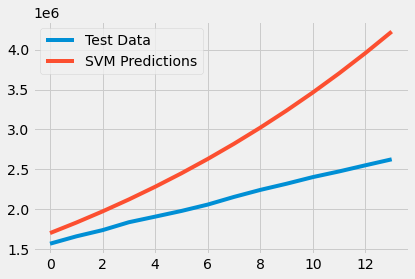

In [0]:
# svm_confirmed = svm_search.best_estimator_
svm_confirmed = SVR(shrinking=True, kernel='poly',gamma=0.01, epsilon=1,degree=6, C=0.1)
svm_confirmed.fit(X_train_confirmed, y_train_confirmed)
svm_pred = svm_confirmed.predict(future_forcast)
# check against testing data
svm_test_pred = svm_confirmed.predict(X_test_confirmed)
plt.plot(y_test_confirmed)
plt.plot(svm_test_pred)
plt.legend(['Test Data', 'SVM Predictions'])
print('MAE:', mean_absolute_error(svm_test_pred, y_test_confirmed))
print('MSE:',mean_squared_error(svm_test_pred, y_test_confirmed))

In [0]:
poly = PolynomialFeatures(degree=5)
poly_X_train_confirmed = poly.fit_transform(X_train_confirmed)
poly_X_test_confirmed = poly.fit_transform(X_test_confirmed)
poly_future_forcast = poly.fit_transform(future_forcast)

Next, lets run the Linear Regression model. 

MAE: 347158.8355793083
MSE: 167519450059.80844


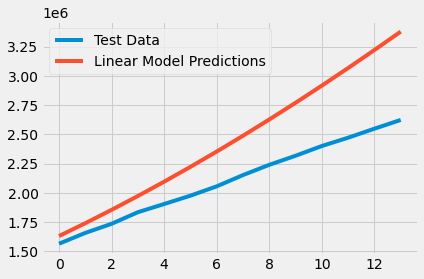

In [0]:

# Linear regression
linear_model = LinearRegression(normalize=True, fit_intercept=False)
linear_model.fit(poly_X_train_confirmed, y_train_confirmed)
test_linear_pred = linear_model.predict(poly_X_test_confirmed)
linear_pred = linear_model.predict(poly_future_forcast)
print('MAE:', mean_absolute_error(test_linear_pred, y_test_confirmed))
print('MSE:',mean_squared_error(test_linear_pred, y_test_confirmed))


plt.plot(y_test_confirmed)
plt.plot(test_linear_pred)
plt.legend(['Test Data', 'Linear Model Predictions'])

In [0]:
# bayesian ridge polynomial regression
tol = [1e-4, 1e-3, 1e-2]
alpha_1 = [1e-7, 1e-6, 1e-5, 1e-4]
alpha_2 = [1e-7, 1e-6, 1e-5, 1e-4]
lambda_1 = [1e-7, 1e-6, 1e-5, 1e-4]
lambda_2 = [1e-7, 1e-6, 1e-5, 1e-4]

bayesian_grid = {'tol': tol, 'alpha_1': alpha_1, 'alpha_2' : alpha_2, 'lambda_1': lambda_1, 'lambda_2' : lambda_2}

bayesian = BayesianRidge(fit_intercept=False, normalize=True)
bayesian_search = RandomizedSearchCV(bayesian, bayesian_grid, scoring='neg_mean_squared_error', cv=3, return_train_score=True, n_jobs=-1, n_iter=40, verbose=1)
bayesian_search.fit(poly_X_train_confirmed, y_train_confirmed)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    1.3s finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=BayesianRidge(alpha_1=1e-06, alpha_2=1e-06,
                                           alpha_init=None, compute_score=False,
                                           copy_X=True, fit_intercept=False,
                                           lambda_1=1e-06, lambda_2=1e-06,
                                           lambda_init=None, n_iter=300,
                                           normalize=True, tol=0.001,
                                           verbose=False),
                   iid='deprecated', n_iter=40, n_jobs=-1,
                   param_distributions={'alpha_1': [1e-07, 1e-06, 1e-05,
                                                    0.0001],
                                        'alpha_2': [1e-07, 1e-06, 1e-05,
                                                    0.0001],
                                        'lambda_1': [1e-07, 1e-06, 1e-05,
                                                 

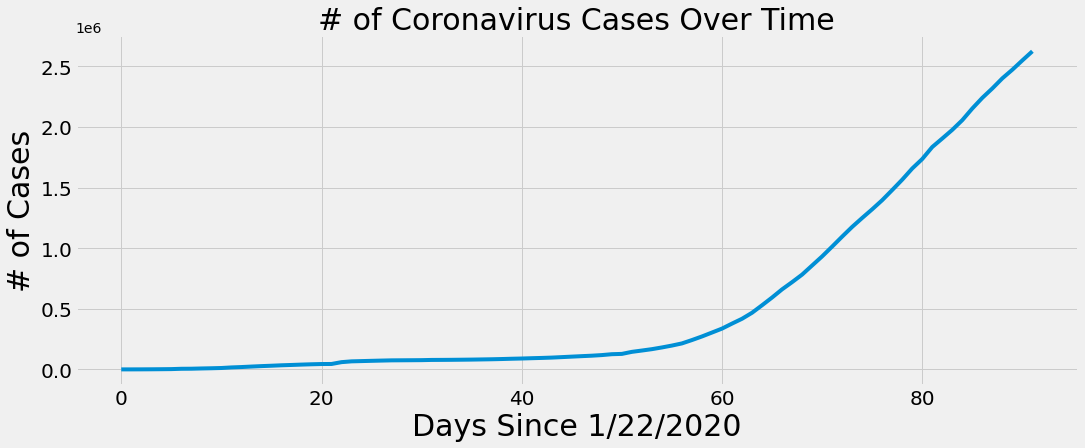

In [0]:
adjusted_dates = adjusted_dates.reshape(1, -1)[0]
plt.figure(figsize=(16, 6))
plt.plot(adjusted_dates, world_cases)
plt.title('# of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

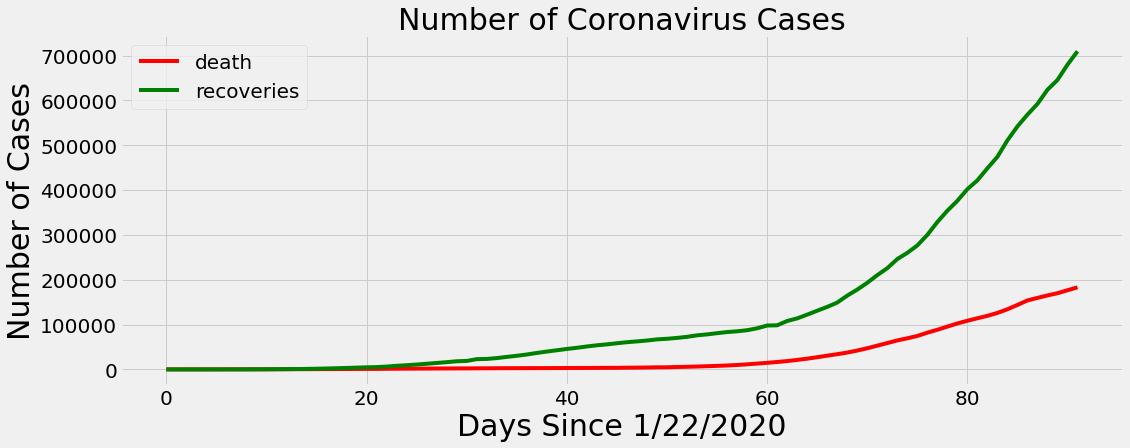

In [0]:
plt.figure(figsize=(16, 6))
plt.plot(adjusted_dates, total_deaths, color='r')
plt.plot(adjusted_dates, total_recovered, color='green')
plt.legend(['death', 'recoveries'], loc='best', fontsize=20)
plt.title('Number of Coronavirus Cases', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.xticks(size=20)
plt.ylabel('Number of Cases', size=30)
plt.yticks(size=20)
plt.show()

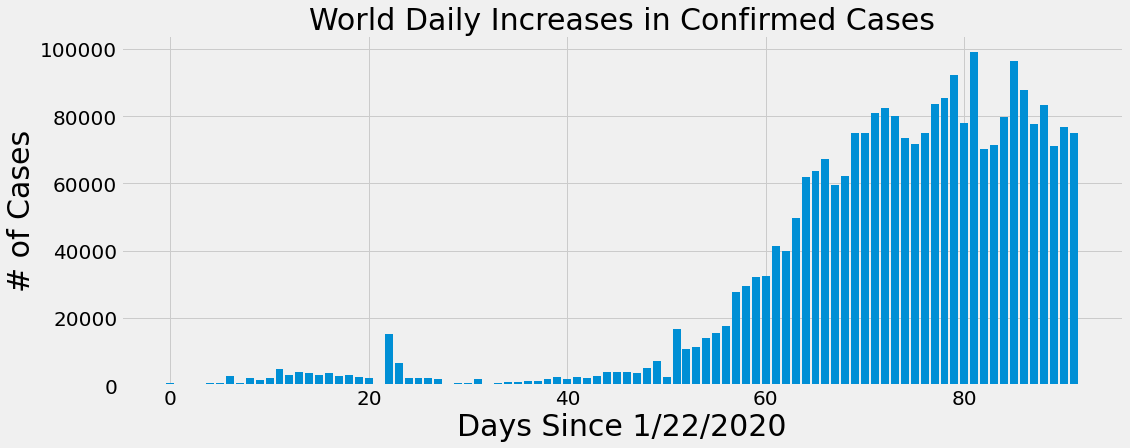

In [0]:
plt.figure(figsize=(16, 6))
plt.bar(adjusted_dates, world_daily_increase)
plt.title('World Daily Increases in Confirmed Cases', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

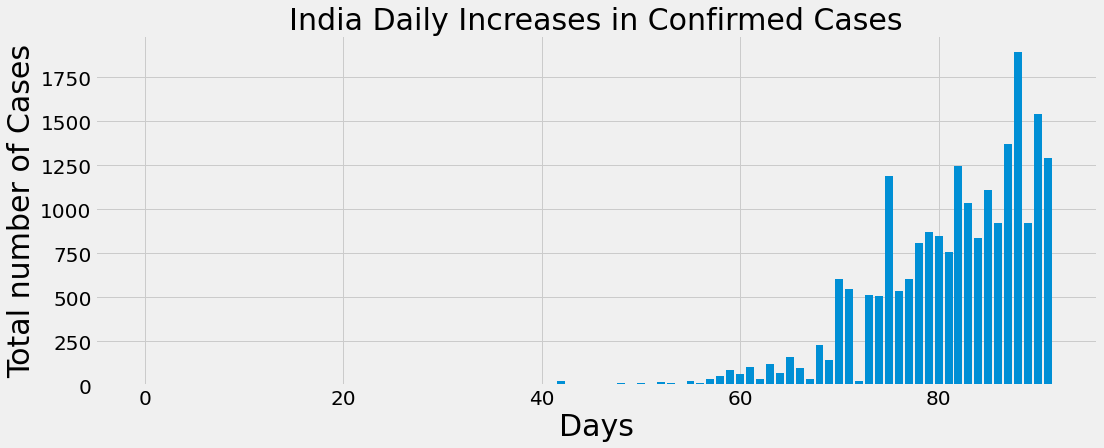

In [0]:
plt.figure(figsize=(16, 6))
plt.bar(adjusted_dates, india_daily_increase)
plt.title('India Daily Increases in Confirmed Cases', size=30)
plt.xlabel('Days', size=30)
plt.ylabel('Total number of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

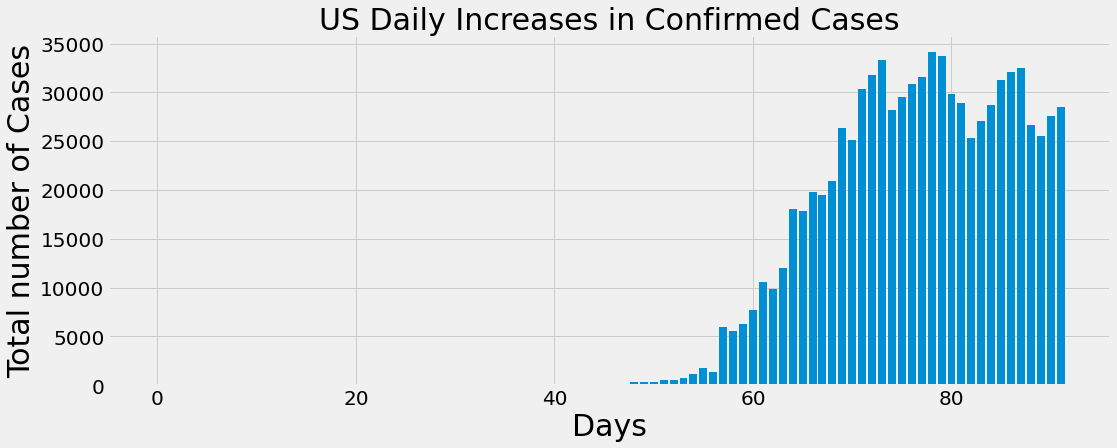

In [0]:
plt.figure(figsize=(16, 6))
plt.bar(adjusted_dates, us_daily_increase)
plt.title('US Daily Increases in Confirmed Cases', size=30)
plt.xlabel('Days', size=30)
plt.ylabel('Total number of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

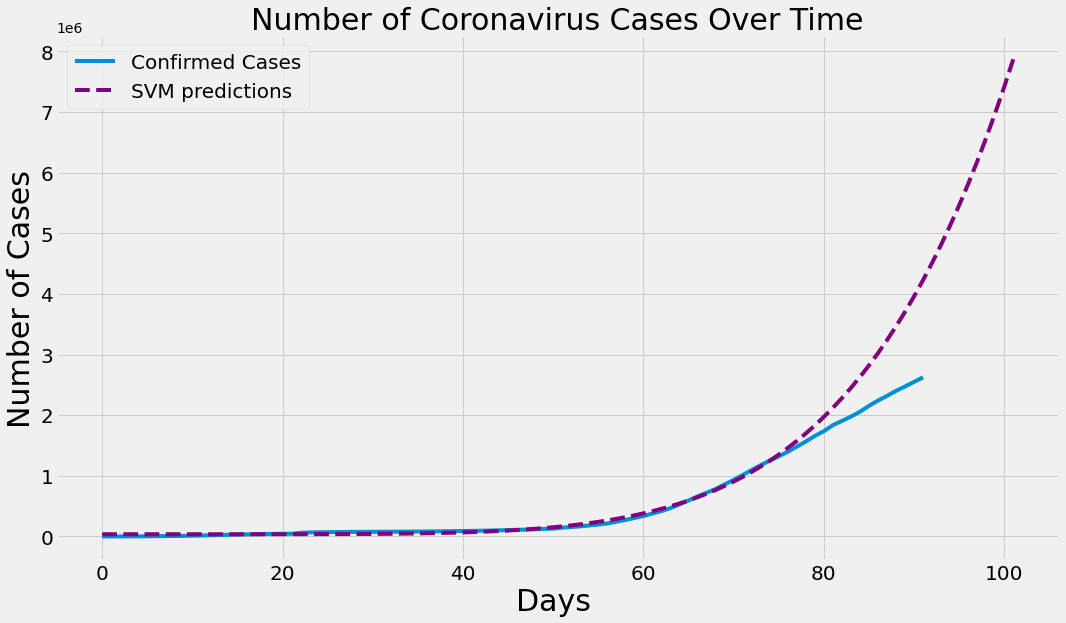

In [0]:
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, world_cases)
plt.plot(future_forcast, svm_pred, linestyle='dashed', color='purple')
plt.title('Number of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days ', size=30)
plt.ylabel('Number of Cases', size=30)
plt.legend(['Confirmed Cases', 'SVM predictions'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [0]:
# Future predictions using SVM 
print('SVM future predictions:')
set(zip(future_forcast_dates[-10:], np.round(svm_pred[-10:])))

SVM future predictions:


{('04/23/2020', 4510243.0),
 ('04/24/2020', 4810023.0),
 ('04/25/2020', 5126361.0),
 ('04/26/2020', 5459981.0),
 ('04/27/2020', 5811630.0),
 ('04/28/2020', 6182078.0),
 ('04/29/2020', 6572122.0),
 ('04/30/2020', 6982582.0),
 ('05/01/2020', 7414304.0),
 ('05/02/2020', 7868160.0)}

Linear Regression Model and Prediction for next 10 days

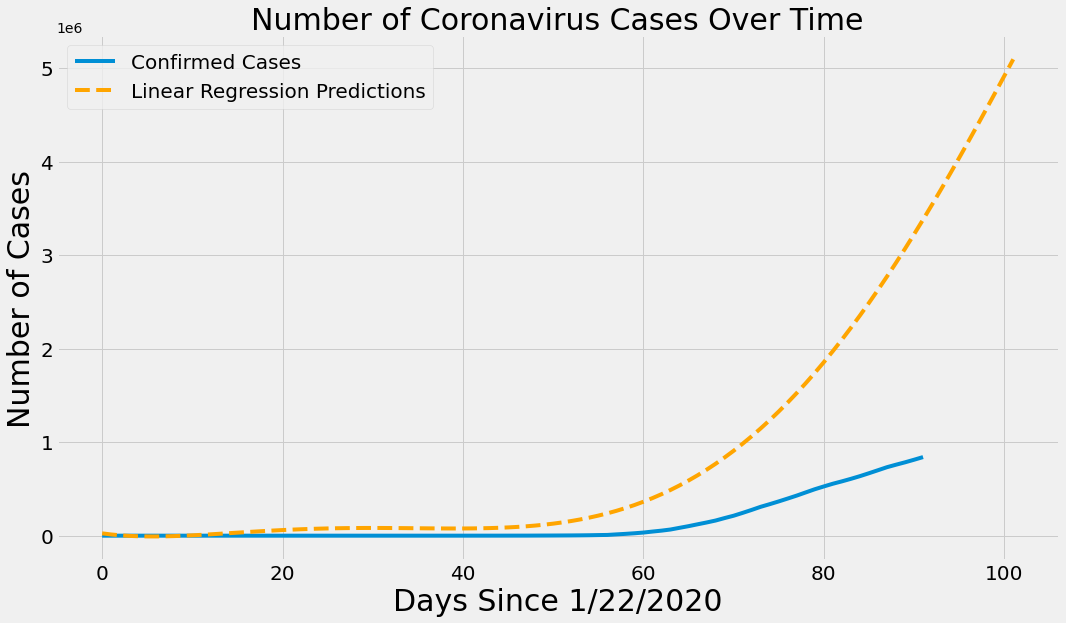

In [0]:
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, us_cases)
plt.plot(future_forcast, linear_pred, linestyle='dashed', color='orange')
plt.title('Number of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Number of Cases', size=30)
plt.legend(['Confirmed Cases', 'Linear Regression Predictions'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [0]:
# Future predictions using Polynomial Regression 
linear_pred = linear_pred.reshape(1,-1)[0]
print('Linear regression future predictions:')
set(zip(future_forcast_dates[-10:], np.round(linear_pred[-10:])))

Linear regression future predictions:


{('04/23/2020', 3540176.0),
 ('04/24/2020', 3703788.0),
 ('04/25/2020', 3870226.0),
 ('04/26/2020', 4039274.0),
 ('04/27/2020', 4210699.0),
 ('04/28/2020', 4384251.0),
 ('04/29/2020', 4559664.0),
 ('04/30/2020', 4736654.0),
 ('05/01/2020', 4914916.0),
 ('05/02/2020', 5094131.0)}

In [0]:
bayesian_confirmed = bayesian_search.best_estimator_
test_bayesian_pred = bayesian_confirmed.predict(poly_X_test_confirmed)
bayesian_pred = bayesian_confirmed.predict(poly_future_forcast)
print('MAE:', mean_absolute_error(test_bayesian_pred, y_test_confirmed))
print('MSE:',mean_squared_error(test_bayesian_pred, y_test_confirmed))

MAE: 418620.63046116184
MSE: 267241987816.36246


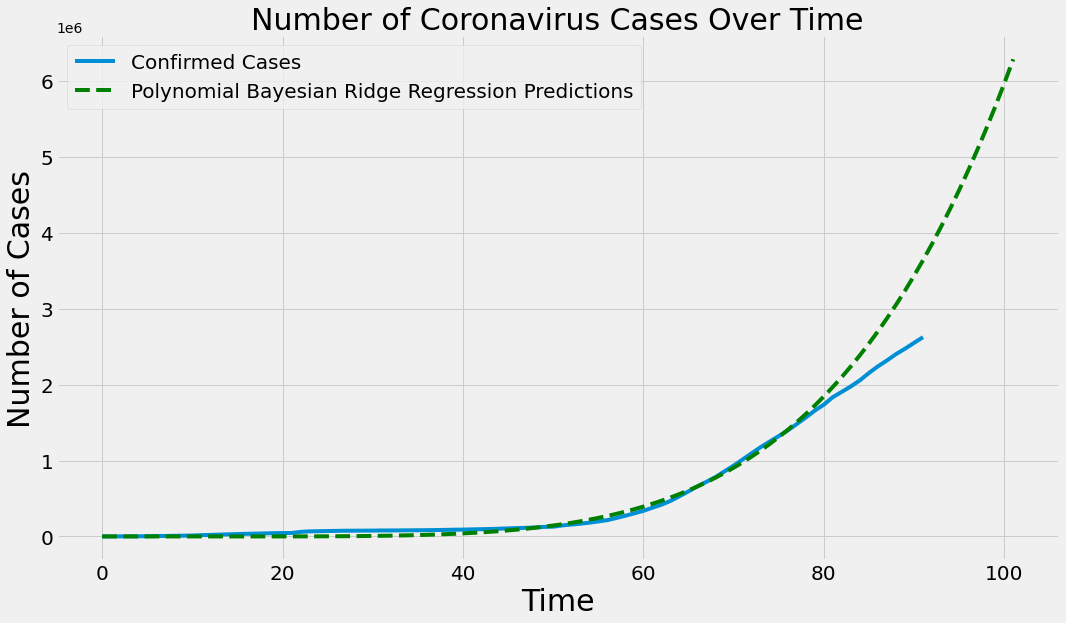

In [0]:
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, world_cases)
plt.plot(future_forcast, bayesian_pred, linestyle='dashed', color='green')
plt.title('Number of Coronavirus Cases Over Time', size=30)
plt.xlabel('Time', size=30)
plt.ylabel('Number of Cases', size=30)
plt.legend(['Confirmed Cases', 'Polynomial Bayesian Ridge Regression Predictions'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [0]:
# Future predictions using Linear Regression 
print('Ridge regression future predictions:')
set(zip(future_forcast_dates[-10:], np.round(bayesian_pred[-10:])))

Ridge regression future predictions:


{('04/23/2020', 3853764.0),
 ('04/24/2020', 4078896.0),
 ('04/25/2020', 4314405.0),
 ('04/26/2020', 4560643.0),
 ('04/27/2020', 4817973.0),
 ('04/28/2020', 5086764.0),
 ('04/29/2020', 5367395.0),
 ('04/30/2020', 5660252.0),
 ('05/01/2020', 5965729.0),
 ('05/02/2020', 6284229.0)}

In [0]:
#Considering the latest count confimed
latest_confirmed = df_confirmed[dates[-1]]
latest_deaths = df_deaths[dates[-1]]
latest_recoveries = df_recovered[dates[-1]]
unique_countries =  list(df_confirmed['Country'].unique())
country_confirmed_cases = []
no_cases = []


for i in unique_countries:
    cases = latest_confirmed[df_confirmed['Country']==i].sum()
    if cases > 0:
        country_confirmed_cases.append(cases)
    else:
        no_cases.append(i)
        
for i in no_cases:
    unique_countries.remove(i)
    
# sort countries by the number of confirmed cases
unique_countries = [k for k, v in sorted(zip(unique_countries, country_confirmed_cases), key=operator.itemgetter(1), reverse=True)]
for i in range(len(unique_countries)):
    country_confirmed_cases[i] = latest_confirmed[df_confirmed['Country']==unique_countries[i]].sum()

# Only show 10 countries with the most confirmed cases, the rest are grouped into the other category
visual_unique_countries = [] 
visual_confirmed_cases = []
others = np.sum(country_confirmed_cases[10:])

for i in range(len(country_confirmed_cases[:10])):
    visual_unique_countries.append(unique_countries[i])
    visual_confirmed_cases.append(country_confirmed_cases[i])
    
visual_unique_countries.append('Others')
visual_confirmed_cases.append(others)

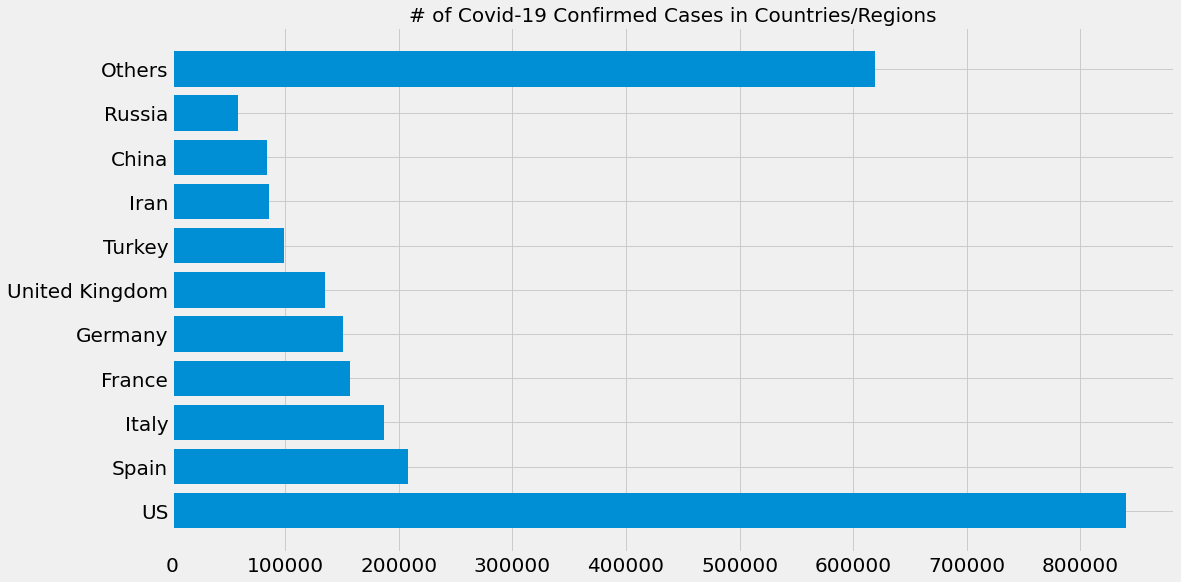

In [0]:
plt.figure(figsize=(16, 9))
plt.barh(visual_unique_countries, visual_confirmed_cases)
plt.title('# of Covid-19 Confirmed Cases in Countries/Regions', size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

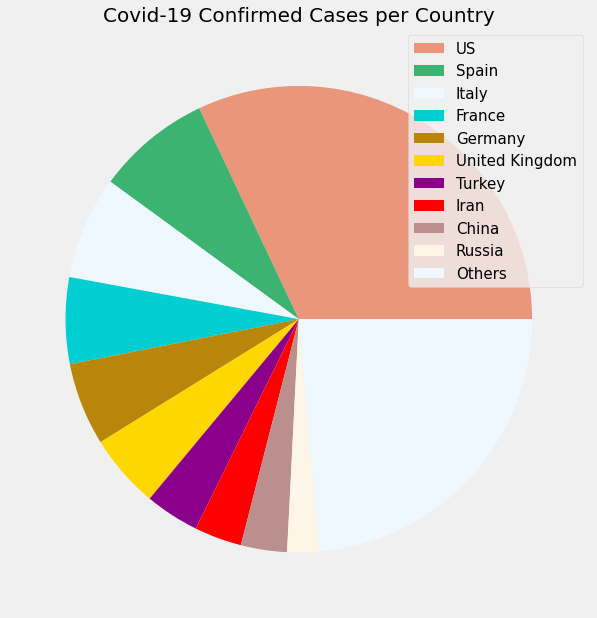

In [0]:

c = random.choices(list(mcolors.CSS4_COLORS.values()),k = len(unique_countries))
plt.figure(figsize=(10,10))
plt.title('Covid-19 Confirmed Cases per Country', size=20)
plt.pie(visual_confirmed_cases, colors=c)
plt.legend(visual_unique_countries, loc='best', fontsize=15)
plt.show()

Stocks prediction for different industries due to COVID

![alt text](https://content.fortune.com/wp-content/uploads/2019/10/GettyImages-1158402857.jpg?resize=150,100)

In [0]:
# Reading Data
import pandas_datareader as pdr

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-darkgrid')

# Data Manipulation
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import random

timelines = pd.read_csv('sample_data/pandemics_timelines.csv').dropna()
for col in timelines.columns[1:]:
    timelines[col] = pd.to_datetime(timelines[col])
timelines

covid_timelines = timelines.loc[timelines.pandemic_name=='covid19']
def plot_cumulative_returns(data,tl):
    data_cum_ret = (data.pct_change()+1).cumprod()
    data_cum_ret.plot(figsize=(10,7),grid=True)
    
    plt.legend(loc='best')
    plt.ylabel('Cumulative Returns')
    plt.axvline(x=tl.first_case.iloc[0],color='RoyalBlue',linestyle='dashdot',linewidth=3)
    plt.axvline(x=tl.who_emergency.iloc[0],color='Red',linestyle='dashdot',linewidth=3)
    plt.axvline(x=tl.pandemic_declaration.iloc[0],color='LightSeaGreen',linestyle='dashdot',linewidth=3)
    plt.axvspan(tl.last_date.iloc[0], tl.last_date.iloc[0]+timedelta(days=365),color='dodgerblue', alpha=0.2)
    plt.show()
 
def plot_sector(tl):
    sector_list = ['IHE', 'IYW', 'IYF', 'IYK', 'IYZ','ITM', 'IYE', 'IYT']

    columns = ['Pharma', 'Technology', 'Financials', 'Consumer Goods',
               'Telecom', 'Basic Materials', 'Energy', 'Transport']

    sector_data = pd.DataFrame()
    for inst in sector_list:
        try:
            sector_data[inst] = pdr.get_data_yahoo(inst, tl.first_case.iloc[0]-timedelta(days=30), 
                                        tl.last_date.iloc[0]+timedelta(days=365))['Adj Close']    
        except:
            pass

    sector_data.columns = columns
    plot_cumulative_returns(sector_data, tl)
plot_sector(covid_timelines)

ValueError: ignored

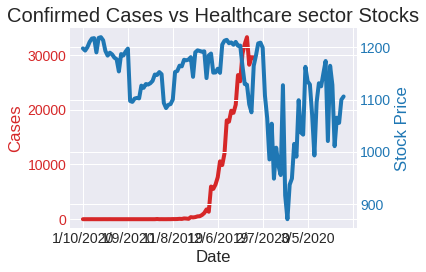

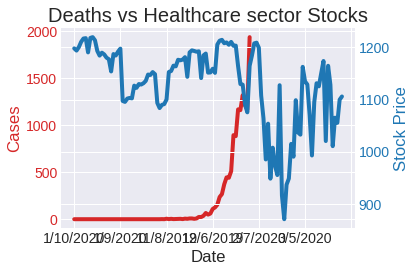

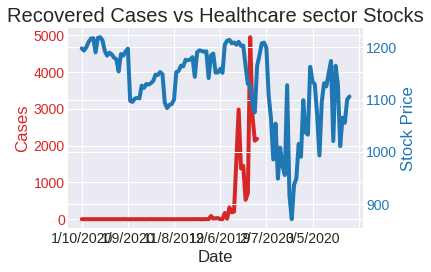

In [0]:
import datetime as dt
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
covid_health_df = pd.read_csv("sample_data/covid_healthcare.csv")
covid_health_df_without_NAN = covid_health_df.fillna(0)
covid_health_grouped = covid_health_df_without_NAN.groupby(["Date"]).mean().reset_index()
covid_health_grouped
covid_df = pd.read_csv("sample_data/covid_19_data_daily.csv")
covid_df
years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
years_fmt = mdates.DateFormatter('%Y')

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticker

fig, ax1 = plt.subplots()
plt.title("Confirmed Cases vs Healthcare sector Stocks")
color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Cases', color=color)
ax1.plot(covid_df["Date"], covid_df["Confirmed"], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

myLocator = mticker.MultipleLocator(20)
ax1.xaxis.set_major_locator(myLocator)
ax2.xaxis.set_major_locator(myLocator)
# fig.autofmt_xdate()

color = 'tab:blue'
ax2.set_ylabel('Stock Price', color=color)  # we already handled the x-label with ax1
ax2.plot(covid_health_grouped["Date"], covid_health_grouped["Price"], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

fig1, ax3 = plt.subplots()
plt.title("Deaths vs Healthcare sector Stocks")

color = 'tab:red'
ax3.set_xlabel('Date')
ax3.set_ylabel('Cases', color=color)
ax3.plot(covid_df["Date"], covid_df["Deaths"], color=color)
ax3.tick_params(axis='y', labelcolor=color)

ax4 = ax3.twinx()

color = 'tab:blue'
ax4.set_ylabel('Stock Price', color=color)  # we already handled the x-label with ax1
ax4.plot(covid_health_grouped["Date"], covid_health_grouped["Price"], color=color)
ax4.tick_params(axis='y', labelcolor=color)

myLocator = mticker.MultipleLocator(20)
ax3.xaxis.set_major_locator(myLocator)
ax4.xaxis.set_major_locator(myLocator)
fig.autofmt_xdate()

fig1.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()


fig2, ax5 = plt.subplots()

plt.title("Recovered Cases vs Healthcare sector Stocks")
color = 'tab:red'
ax5.set_xlabel('Date')
ax5.set_ylabel('Cases', color=color)
ax5.plot(covid_df["Date"], covid_df["Recovered"], color=color)
ax5.tick_params(axis='y', labelcolor=color)

ax6 = ax5.twinx()

color = 'tab:blue'
ax6.set_ylabel('Stock Price', color=color)  # we already handled the x-label with ax1
ax6.plot(covid_health_grouped["Date"], covid_health_grouped["Price"], color=color)
ax6.tick_params(axis='y', labelcolor=color)

myLocator = mticker.MultipleLocator(20)
ax5.xaxis.set_major_locator(myLocator)
ax6.xaxis.set_major_locator(myLocator)
fig.autofmt_xdate()


fig2.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

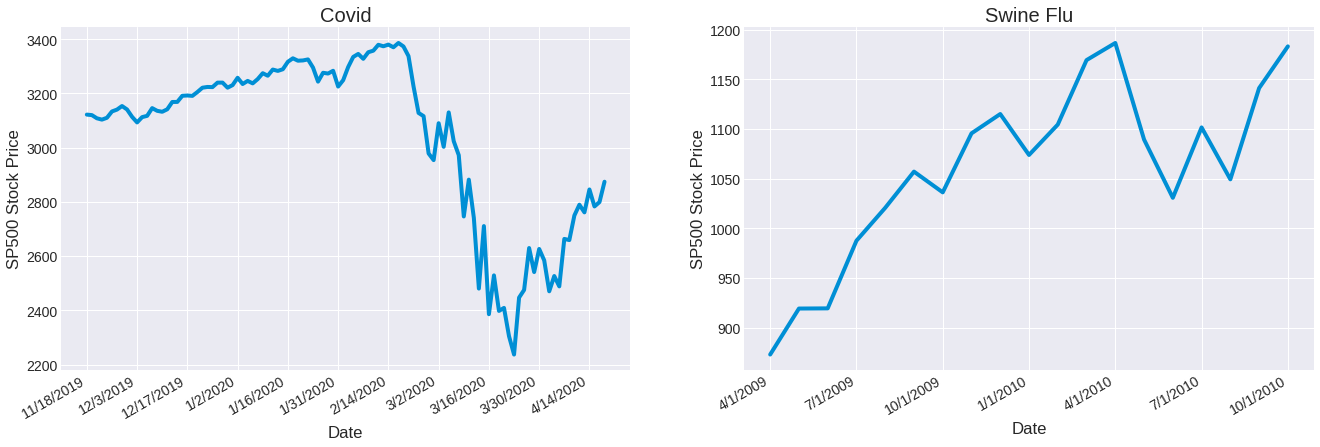

In [0]:
covid_sp = pd.read_csv("sample_data/covid_sp.csv")
swine_sp = pd.read_csv("sample_data/swine_flu_sp.csv")

fig, axs = plt.subplots(1,2, figsize=(20, 7))
axs[0].plot(covid_sp["Date"], covid_sp["Close"])

axs[0].set_xlabel('Date')
axs[0].set_ylabel('SP500 Stock Price')
myLocator = mticker.MultipleLocator(10)
axs[0].xaxis.set_major_locator(myLocator)
axs[0].title.set_text("Covid")

axs[1].plot(swine_sp["Date"], swine_sp["Close"])
axs[1].set_xlabel('Date')
axs[1].set_ylabel('SP500 Stock Price')
axs[1].title.set_text("Swine Flu")
myLocator = mticker.MultipleLocator(3)
axs[1].xaxis.set_major_locator(myLocator)
fig.autofmt_xdate()

plt.show()

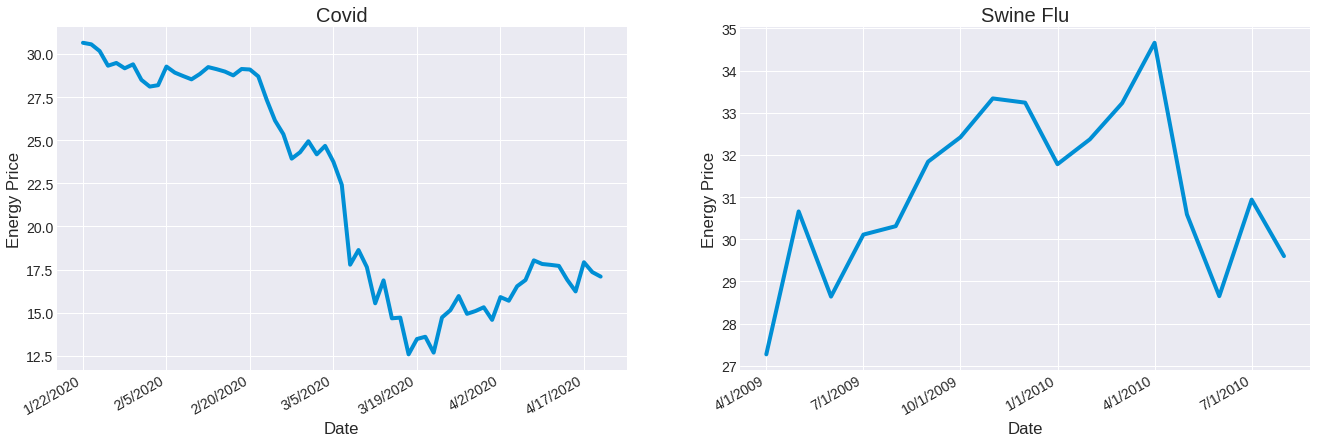

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticker

covid_sp = pd.read_csv("sample_data/covid_energy.csv")
swine_sp = pd.read_csv("sample_data/swineflu_energy.csv")
fig, axs = plt.subplots(1,2, figsize=(20, 7))
axs[0].plot(covid_sp["Date"], covid_sp["Close"])

axs[0].set_xlabel('Date')
axs[0].set_ylabel('Energy Price')
myLocator = mticker.MultipleLocator(10)
axs[0].xaxis.set_major_locator(myLocator)
axs[0].title.set_text("Covid")

axs[1].plot(swine_sp["Date"], swine_sp["Close"])
axs[1].set_xlabel('Date')
axs[1].set_ylabel('Energy Price')
axs[1].title.set_text("Swine Flu")
myLocator = mticker.MultipleLocator(3)
axs[1].xaxis.set_major_locator(myLocator)
fig.autofmt_xdate()

plt.show()

In [0]:
pip install pmdarima

     |████████████████████████████████| 1.5MB 5.0MB/s 


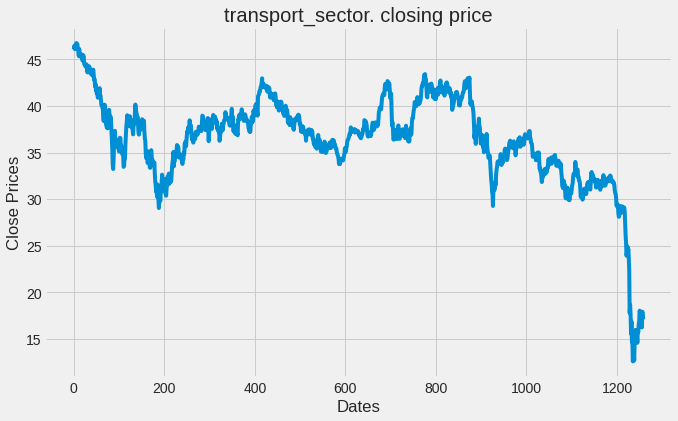

In [0]:
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math


data = pd.read_csv('sample_data/IYE_New_day.csv').fillna(0)
len(data)

df_close = data["Close"]

#plot close price
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Close Prices')
plt.plot(data['Close'])
plt.title('transport_sector. closing price')
plt.show()

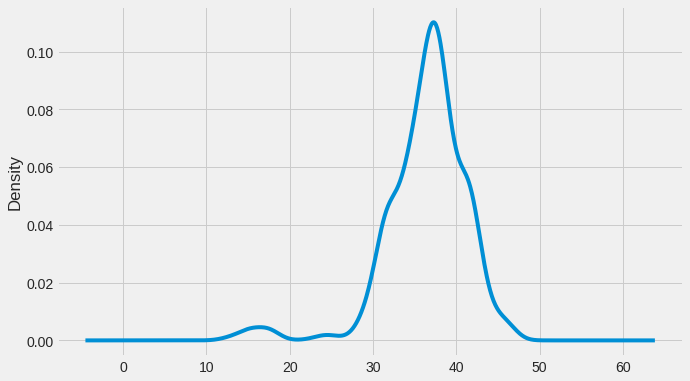

In [0]:
#Distribution of the dataset
df_close.plot(kind='kde')

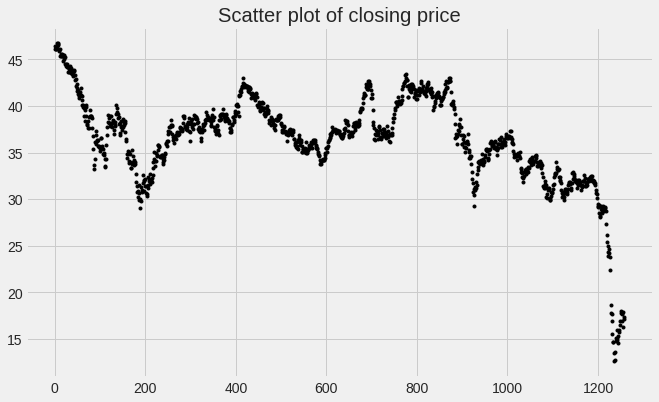

In [0]:
#scatter plot of the sales
df_close = data['Close']
df_close.plot(style='k.')
plt.title('Scatter plot of closing price')
plt.show()

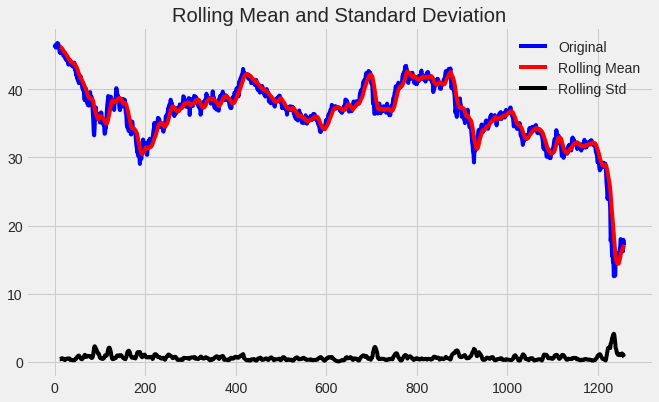

Results of dickey fuller test
Test Statistics                  -0.753257
p-value                           0.832468
No. of lags used                 11.000000
Number of observations used    1247.000000
critical value (1%)              -3.435605
critical value (5%)              -2.863861
critical value (10%)             -2.568005
dtype: float64


In [0]:
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
    
test_stationarity(df_close)


<Figure size 720x432 with 0 Axes>

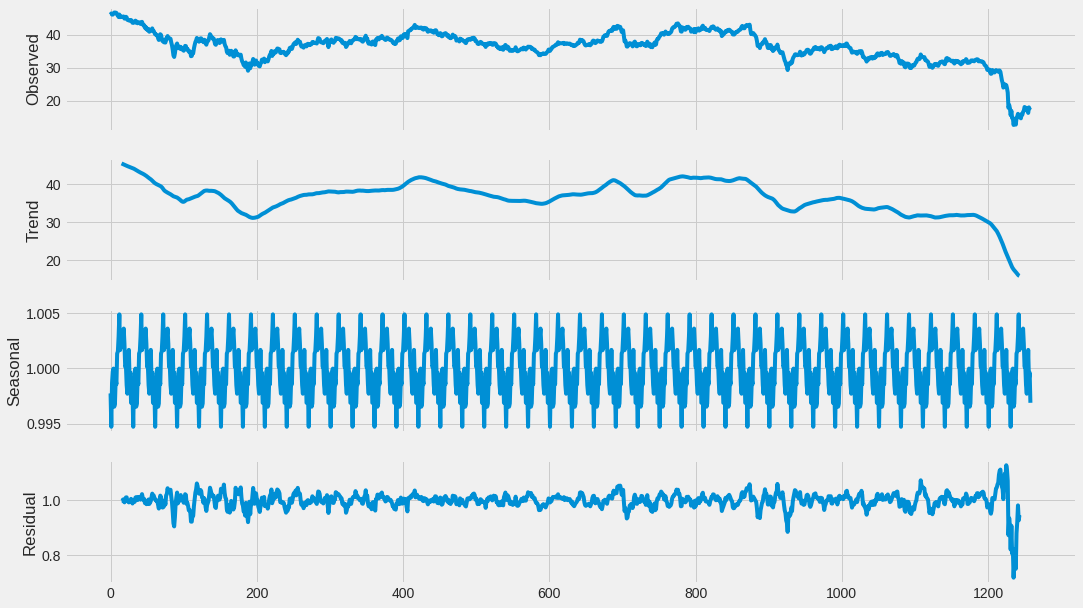

In [0]:
#Separating the trend and the seasonality from a time series
result = seasonal_decompose(df_close, model='multiplicative', freq = 30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(16, 9)


No handles with labels found to put in legend.


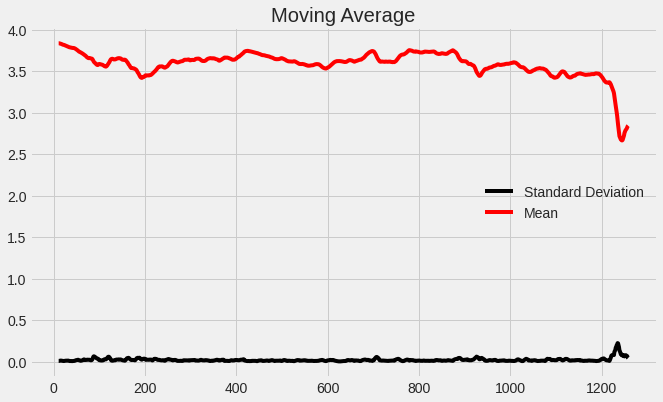

In [0]:
#AS the data is not stationary -- we will eliminate the trend
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
df_log = np.log(df_close)
moving_avg = df_log.rolling(12).mean()
std_dev = df_log.rolling(12).std()
plt.legend(loc='best')
plt.title('Moving Average')
plt.plot(std_dev, color ="black", label = "Standard Deviation")
plt.plot(moving_avg, color="red", label = "Mean")
plt.legend()
plt.show()


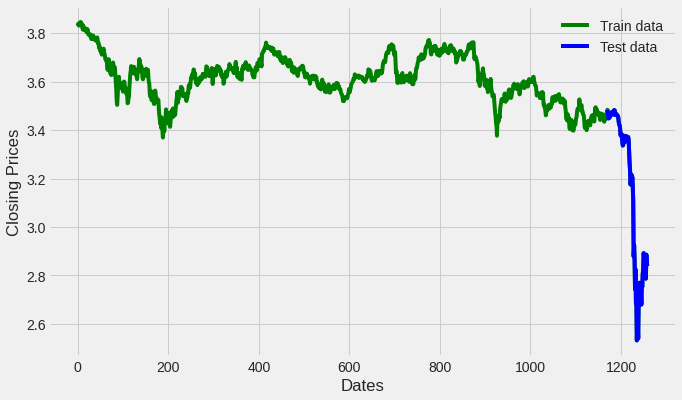

In [0]:
#spliting the data into training and testing set
train_data, test_data = df_log[3:int(len(df_log)*0.93)], df_log[int(len(df_log)*0.93):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df_log, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()


In [0]:
# Build Model
model = ARIMA(train_data, order=(3, 1, 2))  
fitted = model.fit(disp=-1)  
print(fitted.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 1166
Model:                 ARIMA(3, 1, 2)   Log Likelihood                3343.426
Method:                       css-mle   S.D. of innovations              0.014
Date:                Fri, 24 Apr 2020   AIC                          -6672.851
Time:                        02:10:58   BIC                          -6637.422
Sample:                             1   HQIC                         -6659.486
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0003      0.000     -0.786      0.432      -0.001       0.000
ar.L1.D.Close    -1.4456      0.029    -49.266      0.000      -1.503      -1.388
ar.L2.D.Close    -0.9996      0.042    -

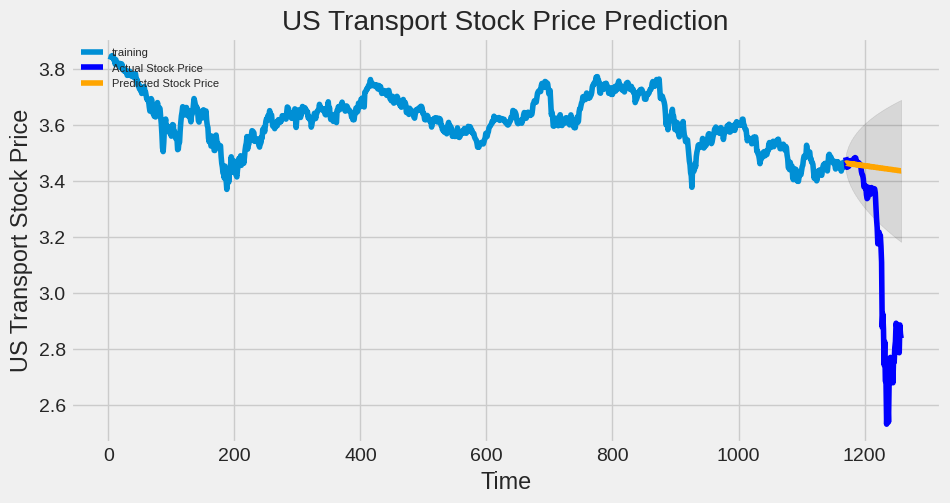

In [0]:
# Forecast---- check for 13********************************
fc, se, conf = fitted.forecast(89, alpha=0.05)  # 95% conf
# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)
lower_series = pd.Series(conf[:, 0], index=test_data.index)
upper_series = pd.Series(conf[:, 1], index=test_data.index)
# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, color = 'blue', label='Actual Stock Price')
plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.10)
plt.title('US Transport Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('US Transport Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

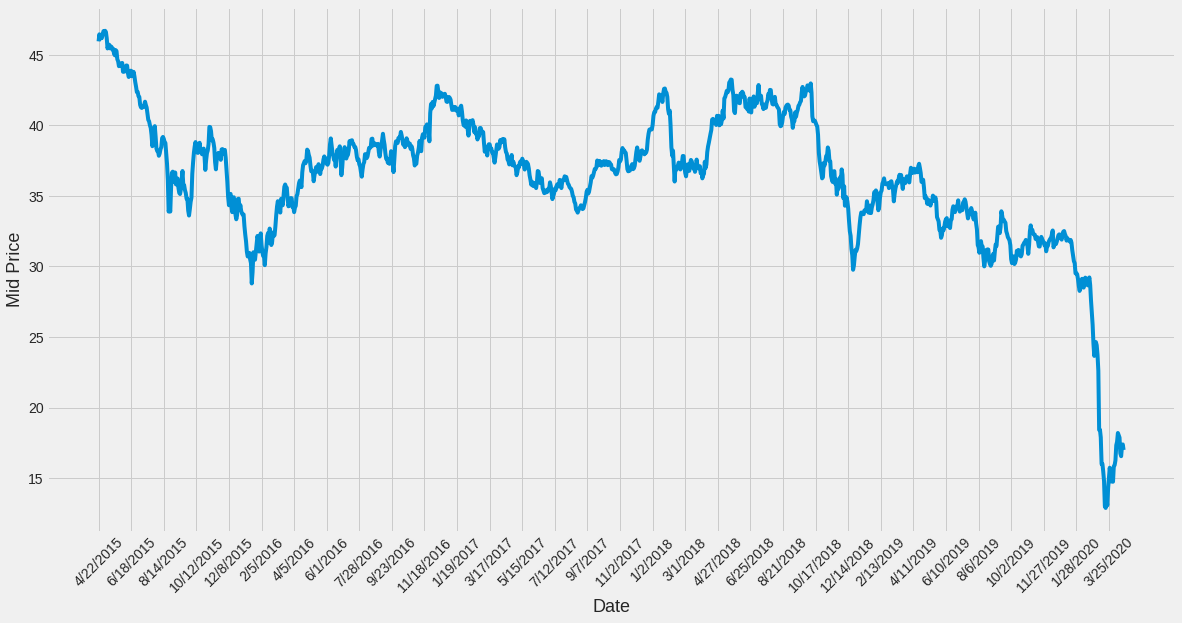

In [0]:
# Energy Stock price prediction using Keras LSTM
# Part 1 - Data Preprocessing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the training set
df = pd.read_csv('sample_data/IYE_New_day.csv').fillna(0)
len(df)


df['Average'] = (df['High'] + df['Low'] )/2 
dataset_train = df[:1000]
dataset_train

plt.figure(figsize = (18,9))
plt.plot(range(df.shape[0]),(df['Low']+df['High'])/2.0)
plt.xticks(range(0,df.shape[0],40),df['Date'].loc[::40],rotation=45)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Mid Price',fontsize=18)
plt.show()

In [0]:
high_prices = df.loc[:,'High'].values
low_prices = df.loc[:,'Low'].values
mid_prices = (high_prices+low_prices)/2.0
training_set = mid_prices[:1000]
training_set
training_set = training_set.reshape(-1,1)
#test_data = test_data.reshape(-1,1)
len(training_set)

# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 1000):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [0]:
# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))


# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

# Part 3 - Making the predictions and visualising the results
dataset_test = df[1000:]
testing_set = mid_prices[1000:]
testing_set = testing_set.reshape(-1,1)
print(len(testing_set))
real_stock_price = testing_set

Using TensorFlow backend.


Epoch 1/100
940/940 [==============================] - 6s 7ms/step - loss: 0.0487
Epoch 2/100
940/940 [==============================] - 4s 5ms/step - loss: 0.0135
Epoch 3/100
940/940 [==============================] - 5s 5ms/step - loss: 0.0105
Epoch 4/100
940/940 [==============================] - 5s 5ms/step - loss: 0.0091
Epoch 5/100
940/940 [==============================] - 5s 5ms/step - loss: 0.0099
Epoch 6/100
940/940 [==============================] - 5s 5ms/step - loss: 0.0085
Epoch 7/100
940/940 [==============================] - 5s 5ms/step - loss: 0.0071
Epoch 8/100
940/940 [==============================] - 5s 5ms/step - loss: 0.0077
Epoch 9/100
940/940 [==============================] - 5s 5ms/step - loss: 0.0079
Epoch 10/100
940/940 [==============================] - 5s 5ms/step - loss: 0.0075
Epoch 11/100
940/940 [==============================] - 5s 5ms/step - loss: 0.0073
Epoch 12/100
940/940 [==============================] - 5s 5ms/step - loss: 0.0068
Epoch 13/100


1000
259


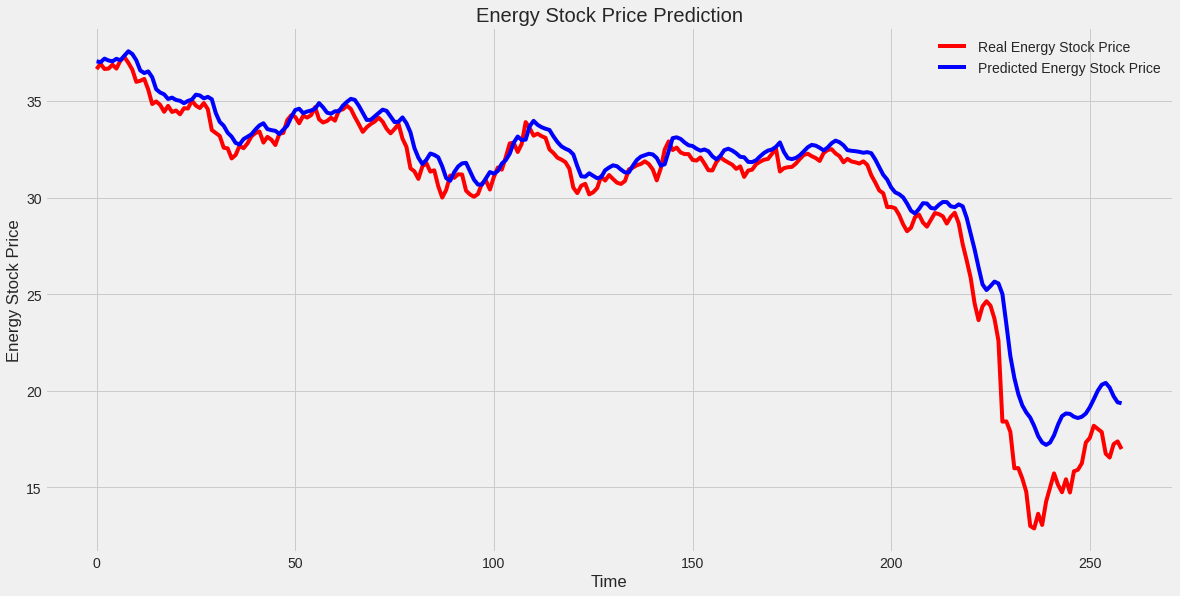

In [0]:
print(len(dataset_train))
print(len(dataset_test))
dataset_total = pd.concat((dataset_train['Average'], dataset_test['Average']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, len(inputs)):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
predicted_stock_price

# Visualising the results
plt.figure(figsize = (18,9))
plt.plot(real_stock_price, color = 'red', label = 'Real Energy Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Energy Stock Price')
plt.title('Energy Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Energy Stock Price')
plt.legend()
plt.show()

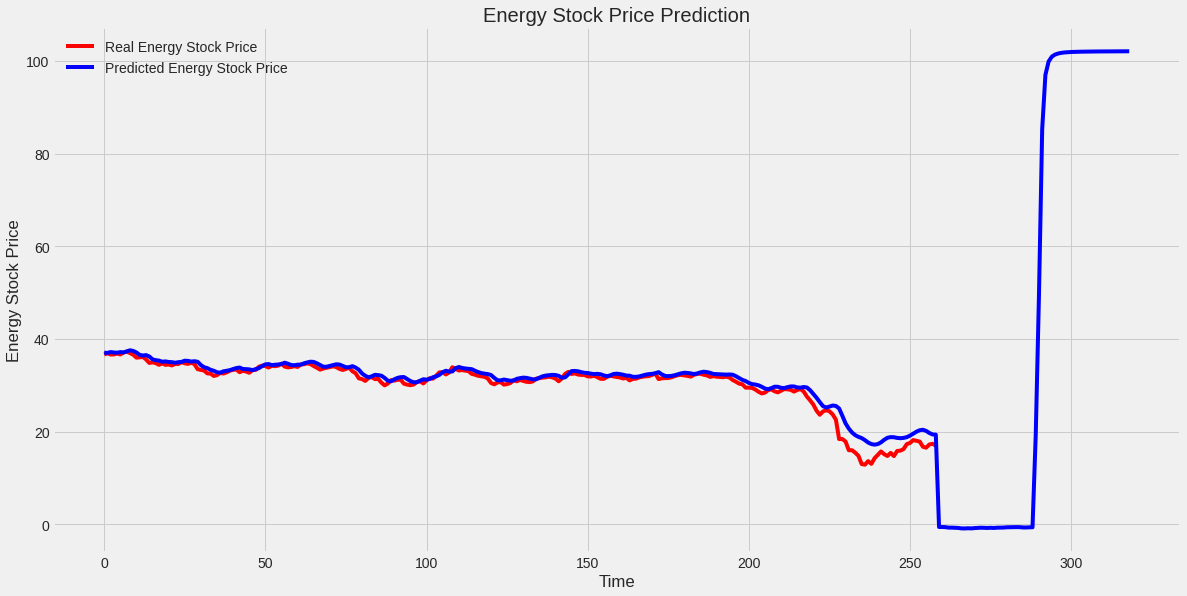

In [0]:

from sklearn.metrics import mean_squared_error 

mean_squared_error(real_stock_price,predicted_stock_price) 


x = X_test[-1]
num_timesteps = 30
preds = []
for i in range(num_timesteps):
    data = np.expand_dims(x, axis=0)
   
    prediction = regressor.predict(data)
    prediction = sc.inverse_transform(prediction)
    x = np.delete(x, 0, axis=0) # delete first row
    x = np.vstack([x, prediction]) # add prediction

x
data = np.expand_dims(x, axis=0)


# Visualising the results
plt.figure(figsize = (18,9))
plt.plot(real_stock_price, color = 'red', label = 'Real Energy Stock Price')
plt.plot(np.concatenate((predicted_stock_price,x)), color = 'blue', label = 'Predicted Energy Stock Price')
plt.title('Energy Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Energy Stock Price')
plt.legend()
plt.show()



**Observation**

---
So the main idea of the project was to explore the impact of pandemic on various sectors. Furthermore, deep-dive into the affects pandemic into few sectors. We observed that there was no effect on the healthcare industry and that transport & energy sector was affected the most by the pandemic.


Conclusion:
---
Assuming that this is the peak of the COVID cases in US, and that there will be no more cases, we have studieed thestock prices of the last 5 years and predicted for the next 30 days. We conclde that, while the stock prices may dip now, it will steadily start to increase in another month or so.
